In [1]:
## Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats
from scipy.stats import f_oneway
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
path="C:/Users/alexa/Desktop/Final Assessment  Instructions, Dataset and Report Template-20240503/Productivity in Garment Manufacturing.csv"
df=pd.read_csv(path)
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# Explore the data

In [3]:
len(df.columns)

15

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


  ## Check for missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
df.mean()

C:\Users\alexa\AppData\Local\Temp\ipykernel_1948\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


team                        6.426901
targeted_productivity       0.729632
smv                        15.062172
wip                      1190.465991
over_time                4567.460317
incentive                  38.210526
idle_time                   0.730159
idle_men                    0.369256
no_of_style_change          0.150376
no_of_workers              34.609858
actual_productivity         0.735091
dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
median=df['wip'].median()
df['wip'].fillna(median,inplace=True)

In [10]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [12]:
#the categorical and nomirical 
cat_cols=df.select_dtypes(include='object')
num_cols=df.select_dtypes(exclude='object')

In [13]:
for cat in cat_cols.columns:
    print (f"{cat}")
    print (cat_cols[cat].unique())
    print()

date
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

department
['sweing' 'finishing ' 'finishing']

day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']



- It is obvious from the above that in one case, 'finishing' is written with a white space after the word. So, the word appears in two ways: 'finishing ' and 'finishing'.

In [14]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [15]:
df['department'] = df['department'].replace(['sweing'],['sewing'])
df['department'] = df['department'].replace(['finishing '],['finishing'])

In [16]:
df['department'].value_counts().index.to_list()

['sewing', 'finishing']

In [17]:
df['department'].value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

In [18]:
df['targeted_productivity'].value_counts()


0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

In [19]:

df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [20]:
# Calculate the percentage distribution of each quarter
quarter_distribution = df['quarter'].value_counts(normalize=True) * 100
quarter_distribution.map("{:.2f}%".format)


Quarter1    30.08%
Quarter2    27.99%
Quarter4    20.72%
Quarter3    17.54%
Quarter5     3.68%
Name: quarter, dtype: object

In [21]:
df['department'].value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

We can see typo, it should be sewing instead of sweing. And finishing written twice, might be because of trailing space. We need to fixed this

In [22]:
df['department'].value_counts().index.to_list()

['sewing', 'finishing']

In [23]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [24]:
df['team'].value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

In [25]:
targeted_productivity_group_quarter=df.groupby('quarter', as_index=False).agg(
    targeted_productivity_Sum=('targeted_productivity', 'sum'),
    Average_of_Amount=('targeted_productivity', 'mean')
)
targeted_productivity_group_quarter.sort_values('targeted_productivity_Sum', ascending=False, inplace=True)

targeted_productivity_group_quarter

,quarter,targeted_productivity_Sum,Average_of_Amount
0,Quarter1,267.87,0.744083
1,Quarter2,245.25,0.732090
3,Quarter4,177.20,0.714516
2,Quarter3,151.45,0.721190
4,Quarter5,31.60,0.718182


In [26]:
targeted_productivity_group_quarter=df.groupby('quarter', as_index=False).agg(
    targeted_productivity_Sum=('targeted_productivity', 'sum'),
    Average_of_Amount=('targeted_productivity', 'mean')
)
targeted_productivity_group_quarter.sort_values('targeted_productivity_Sum', ascending=False, inplace=True)

targeted_productivity_group_quarter

,quarter,targeted_productivity_Sum,Average_of_Amount
0,Quarter1,267.87,0.744083
1,Quarter2,245.25,0.732090
3,Quarter4,177.20,0.714516
2,Quarter3,151.45,0.721190
4,Quarter5,31.60,0.718182


In [27]:
# Group by team and calculate the average actual productivity
team_productivity = df.groupby('team')['actual_productivity'].mean().reset_index()

most_productive_team = team_productivity.loc[team_productivity['actual_productivity'].idxmax()]

least_productive_team = team_productivity.loc[team_productivity['actual_productivity'].idxmin()]


In [28]:
team_productivity

,team,actual_productivity
0,1,0.821054
1,2,0.770855
2,3,0.803880
3,4,0.770035
4,5,0.697981
5,6,0.685385
6,7,0.668006
7,8,0.674148
8,9,0.734462
9,10,0.719736


In [29]:
most_productive_team

team                   1.000000
actual_productivity    0.821054
Name: 0, dtype: float64

In [30]:
least_productive_team

team                   7.000000
actual_productivity    0.668006
Name: 6, dtype: float64

## 1- Does the actual productivity of each team exceed their targeted productivity? Which team is the most and least productive?

In [31]:
# Select specific teams
team_1_productivity = df[df['team'] == 1]['actual_productivity']
team_2_productivity = df[df['team'] == 7]['actual_productivity']

t_stat, p_value = stats.ttest_ind(team_1_productivity, team_2_productivity, equal_var=True)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in productivity between Team 1 and Team 7.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in productivity between Team 1 and Team 7.")

T-statistic: 6.507679291897528, P-value: 6.063673002193352e-10
Reject the null hypothesis: There is a significant difference in productivity between Team 1 and Team 7.


In [32]:
actual_productivities = [df[df['team'] == team]['actual_productivity'] for team in df['team'].unique()]
targeted_productivities = [df[df['team'] == team]['targeted_productivity'] for team in df['team'].unique()]

f_stat_actual, p_value_actual = f_oneway(*actual_productivities)
f_stat_targeted, p_value_targeted = f_oneway(*targeted_productivities)

print(f"Actual Productivity ANOVA Results: F-statistic = {f_stat_actual}, p-value = {p_value_actual}")
print(f"Targeted Productivity ANOVA Results: F-statistic = {f_stat_targeted}, p-value = {p_value_targeted}")

a = 0.05


if p_value_actual < a:
    print("Reject the null hypothesis: There is a significant difference in actual productivity between the teams.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in actual productivity between the teams.")

if p_value_targeted < a:
    print("Reject the null hypothesis: There is a significant difference in targeted productivity between the teams.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in targeted productivity between the teams.")




Actual Productivity ANOVA Results: F-statistic = 10.213784537959581, p-value = 5.164908070183416e-18
Targeted Productivity ANOVA Results: F-statistic = 7.905788361373283, p-value = 2.2241848110143892e-13
Reject the null hypothesis: There is a significant difference in actual productivity between the teams.
Reject the null hypothesis: There is a significant difference in targeted productivity between the teams.


In [33]:

average_actual = df.groupby('team')['actual_productivity'].mean()
average_targeted = df.groupby('team')['targeted_productivity'].mean()

team_productivity_comparison = pd.DataFrame({
    'Average Actual Productivity': average_actual,
    'Average Targeted Productivity': average_targeted
})

team_productivity_comparison['Difference'] = team_productivity_comparison['Average Actual Productivity'] - team_productivity_comparison['Average Targeted Productivity']

team_productivity_comparison = team_productivity_comparison.sort_values(by='Difference', ascending=False)

most_productive_team = team_productivity_comparison['Average Actual Productivity'].idxmax()
least_productive_team = team_productivity_comparison['Average Actual Productivity'].idxmin()

team_productivity_comparison


,Average Actual Productivity,Average Targeted Productivity,Difference
team,,,
1,0.821054,0.746667,0.074388
3,0.803880,0.742105,0.061775
4,0.770035,0.717619,0.052416
2,0.770855,0.739908,0.030947
5,0.697981,0.673656,0.024325
12,0.779055,0.774242,0.004813
10,0.719736,0.738500,-0.018764
11,0.681985,0.703977,-0.021993
9,0.734462,0.758173,-0.023711


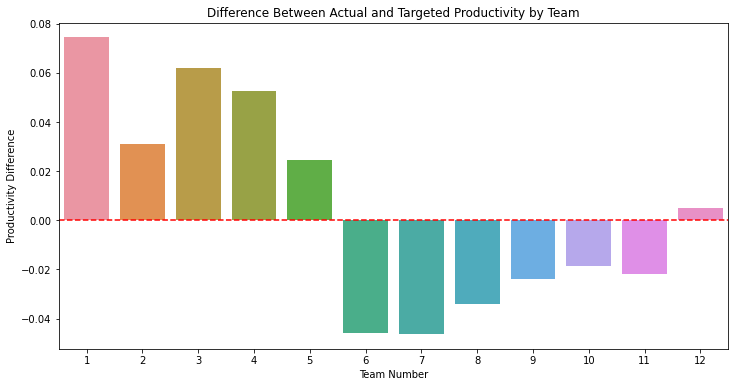

In [34]:

# Calculate the difference between actual and targeted productivity
df['productivity_difference'] = df['actual_productivity'] - df['targeted_productivity']

team_productivity = df.groupby('team').agg({
    'productivity_difference': 'mean',
    'actual_productivity': 'mean',
    'targeted_productivity': 'mean'
}).reset_index()

most_productive_team = team_productivity[team_productivity['actual_productivity'] == team_productivity['actual_productivity'].max()]
least_productive_team = team_productivity[team_productivity['actual_productivity'] == team_productivity['actual_productivity'].min()]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='productivity_difference', data=team_productivity)
plt.title('Difference Between Actual and Targeted Productivity by Team')
plt.xlabel('Team Number')
plt.ylabel('Productivity Difference')
plt.axhline(0, color='red', linestyle='--')
plt.show()



In [35]:
most_productive_team


,team,productivity_difference,actual_productivity,targeted_productivity
0,1,0.074388,0.821054,0.746667


In [36]:
least_productive_team

,team,productivity_difference,actual_productivity,targeted_productivity
6,7,-0.046265,0.668006,0.714271


In [37]:
df_group_team_department = df.groupby(['team', 'department'], as_index=False).agg(
    over_time_Sum=('over_time', 'sum'),
    no_of_workers_Count=('no_of_workers', 'count'),
    Average_of_Amount=('actual_productivity', 'mean')
)
df_group_team_department['department'] = df_group_team_department['department']

df_group_team_department


,team,department,over_time_Sum,no_of_workers_Count,Average_of_Amount
0,1,finishing,92520,49,0.827803
1,1,sewing,410790,56,0.815150
2,2,finishing,103140,52,0.780130
3,2,sewing,374820,57,0.762394
4,3,finishing,102660,37,0.847327
5,3,sewing,408030,58,0.776163
6,4,finishing,126900,46,0.820643
7,4,sewing,445320,59,0.730577
8,5,finishing,74040,35,0.791600
9,5,sewing,421740,58,0.641486


In [38]:
average_overtime = df.groupby('department')['over_time'].sum().reset_index()
average_actual_productivity= df.groupby('department')['actual_productivity'].mean().reset_index()

# Merge the averages into a single DataFrame
tedious_comparison = average_overtime.merge(average_actual_productivity, on='department', how='inner')

print(tedious_comparison)

  department  over_time  actual_productivity
0  finishing     970080             0.752951
1     sewing    4497170             0.722013


# Which of the two garment production processes (sewing and finishing) is considered the most tedious?

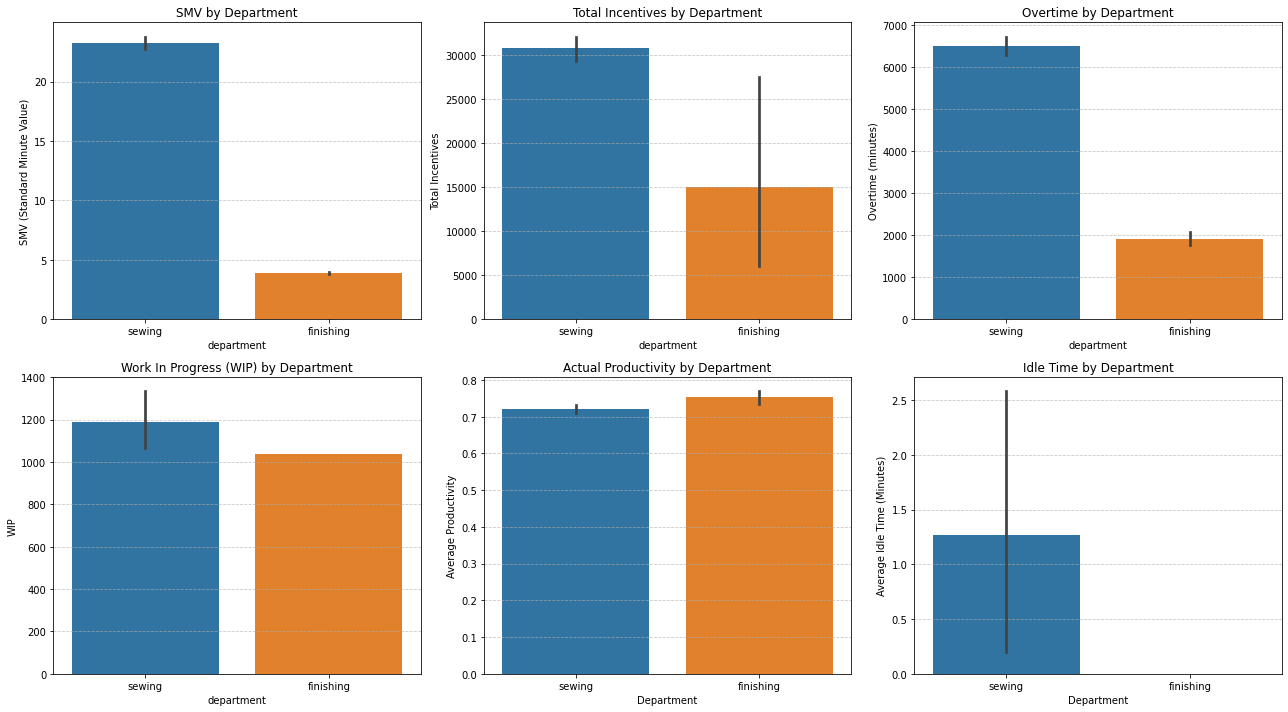

In [39]:

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plot SMV comparison
sns.barplot(data=df, x='department', y='smv', ax=axs[0][0])
axs[0][0].set_title('SMV by Department')
axs[0][0].set_ylabel('SMV (Standard Minute Value)')
axs[0][0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot sum of incentives
sns.barplot(data=df, x='department', y='incentive', ax=axs[0][1], estimator=np.sum)
axs[0][1].set_title('Total Incentives by Department')
axs[0][1].set_ylabel('Total Incentives')
axs[0][1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot overtime comparison
sns.barplot(data=df, x='department', y='over_time', ax=axs[0][2])
axs[0][2].set_title('Overtime by Department')
axs[0][2].set_ylabel('Overtime (minutes)')
axs[0][2].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Work in Progress 
sns.barplot(data=df, x='department', y='wip', ax=axs[1][0])
axs[1][0].set_title('Work In Progress (WIP) by Department')
axs[1][0].set_ylabel('WIP')
axs[1][0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot overtime comparison
sns.barplot(data=df, x='department', y='actual_productivity', ax=axs[1][1])
axs[1][1].set_title('Actual Productivity by Department')
axs[1][1].set_xlabel('Department')
axs[1][1].set_ylabel('Average Productivity')
axs[1][1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Work in Progress (WIP) comparison
sns.barplot(data=df, x='department', y='idle_time', ax=axs[1][2])
axs[1][2].set_title('Idle Time by Department')
axs[1][2].set_xlabel('Department')
axs[1][2].set_ylabel('Average Idle Time (Minutes)')
axs[1][2].grid(axis='y', linestyle='--', alpha=0.7)



plt.tight_layout()
plt.show()



In [40]:
# Filter data for sewing and finishing departments
sewing = df[df['department'] == 'sewing']['actual_productivity']
finishing = df[df['department'] == 'finishing']['actual_productivity']

# t-test
t_stat, p_value = stats.ttest_ind(sewing, finishing, equal_var=True)  # equal_var is True if variances are assumed to be equal


print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in productivity.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in productivity.")


T-statistic: -3.040752443283168, P-value: 0.0024112599776238385
Reject the null hypothesis: There is a significant difference in productivity.


 # Which day do workers typically take as a rest day, and how does this affect their productivity afterward?

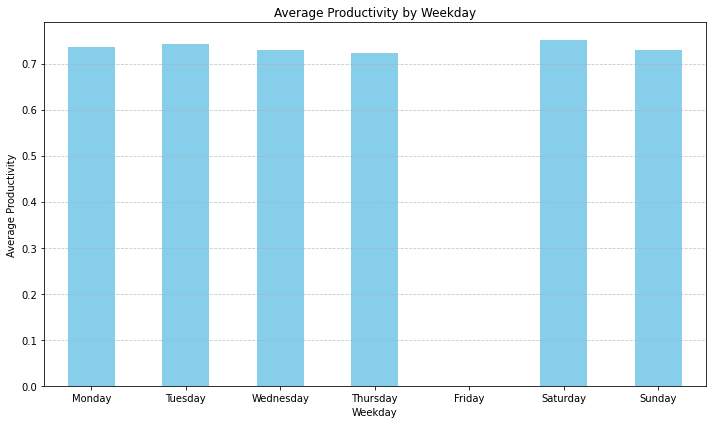

day
Monday       0.735488
Tuesday      0.742701
Wednesday    0.730462
Thursday     0.722641
Friday            NaN
Saturday     0.751929
Sunday       0.728604
Name: actual_productivity, dtype: float64

In [41]:
# Group data by weekday to analyze average productivity
productivity_by_day = df.groupby('day')['actual_productivity'].mean()

# Sort
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
productivity_by_day = productivity_by_day.reindex(ordered_days)

plt.figure(figsize=(10, 6))
productivity_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Productivity by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Productivity')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

productivity_by_day


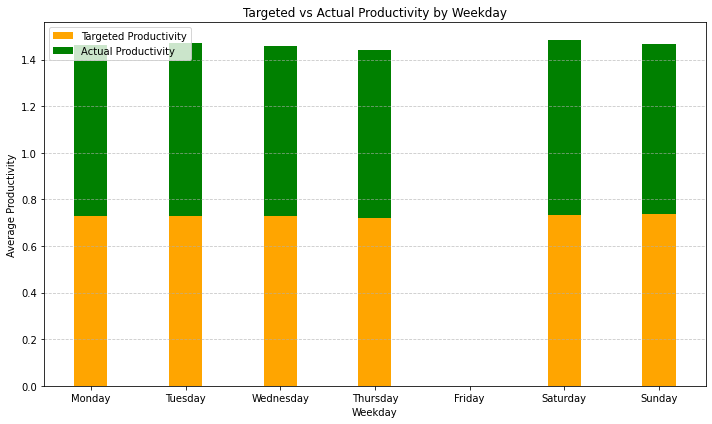

In [42]:
targeted_productivity_by_day = df.groupby('day')['targeted_productivity'].mean()
targeted_productivity_by_day = targeted_productivity_by_day.reindex(ordered_days)


plt.figure(figsize=(10, 6))
width = 0.35
x = range(len(ordered_days))

plt.bar(x, targeted_productivity_by_day.values, width, label='Targeted Productivity', color='orange')
plt.bar(x, productivity_by_day.values, width, label='Actual Productivity', color='green', bottom=targeted_productivity_by_day.values)

plt.title('Targeted vs Actual Productivity by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Productivity')
plt.xticks(x, ordered_days, rotation=0)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [43]:
average_actual = df.groupby('day')['actual_productivity'].mean()
average_targeted = df.groupby('day')['targeted_productivity'].mean()

team_productivity_comparison = pd.DataFrame({
    'Average Actual Productivity': average_actual,
    'Average Targeted Productivity': average_targeted
})

team_productivity_comparison['Difference'] = team_productivity_comparison['Average Actual Productivity'] - team_productivity_comparison['Average Targeted Productivity']

team_productivity_comparison = team_productivity_comparison.sort_values(by='Difference', ascending=False)

# Identify the most and least productive teams
most_productive_team = team_productivity_comparison['Average Actual Productivity'].idxmax()
least_productive_team = team_productivity_comparison['Average Actual Productivity'].idxmin()

team_productivity_comparison

,Average Actual Productivity,Average Targeted Productivity,Difference
day,,,
Saturday,0.751929,0.733690,0.018239
Tuesday,0.742701,0.727612,0.015089
Monday,0.735488,0.729397,0.006092
Thursday,0.722641,0.720704,0.001937
Wednesday,0.730462,0.729087,0.001375
Sunday,0.728604,0.737438,-0.008834


# When does the company pay more incentives to its workers, and do both sewing and finishing departments enjoy the same incentives?

In [44]:

incentive_stats = df.groupby(['date', 'department'])['incentive'].sum().reset_index()
incentive_dept = df.groupby(['quarter', 'department'])['incentive'].sum().reset_index()
overall_incentives = df.groupby('department')['incentive'].sum().reset_index()

# Analyze the highest incentive periods
top_incentive_periods = incentive_stats.sort_values(by='incentive', ascending=False).head(10)
top_incentive_periods = pd.merge(top_incentive_periods, df[['date', 'quarter']].drop_duplicates(), on='date', how='left')


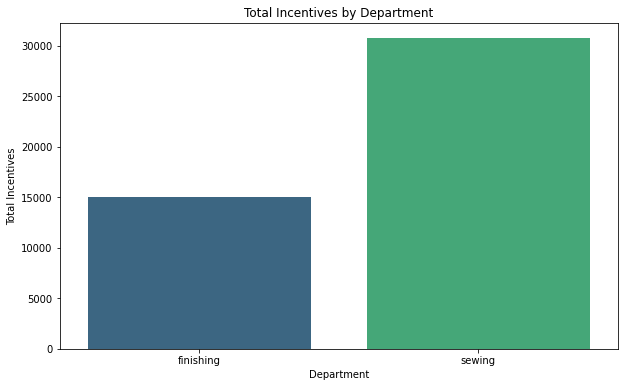

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=overall_incentives, x='department', y='incentive', palette='viridis')
plt.title('Total Incentives by Department')
plt.xlabel('Department')
plt.ylabel('Total Incentives')
plt.show()


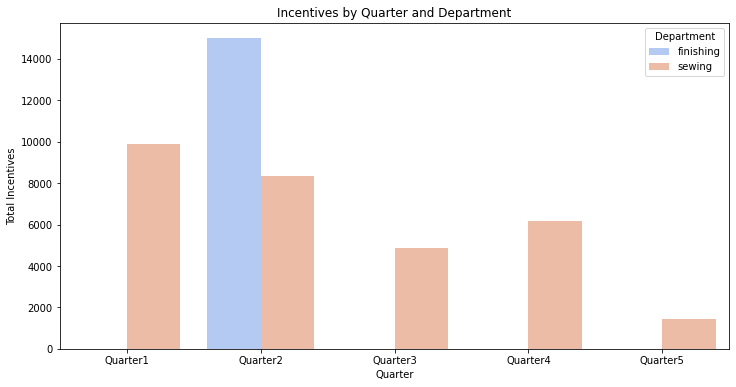

,date,department,incentive,quarter
0,3/9/2015,finishing,15000,Quarter2
1,1/31/2015,sewing,742,Quarter5
2,1/29/2015,sewing,718,Quarter5
3,1/8/2015,sewing,691,Quarter2
4,1/24/2015,sewing,682,Quarter4
5,1/7/2015,sewing,672,Quarter1
6,1/28/2015,sewing,659,Quarter4
7,1/25/2015,sewing,656,Quarter4
8,2/1/2015,sewing,652,Quarter1
9,2/3/2015,sewing,640,Quarter1


In [46]:

# Visualize the incentives by quarter for both departments
plt.figure(figsize=(12, 6))
sns.barplot(data=incentive_dept, x='quarter', y='incentive', hue='department', palette='coolwarm')
plt.title('Incentives by Quarter and Department')
plt.xlabel('Quarter')
plt.ylabel('Total Incentives')
plt.legend(title='Department')
plt.show()

top_incentive_periods


In [47]:
# Group by quarter and department 
grouped_incentives = df.groupby(['quarter', 'department'])['incentive'].mean().unstack()

# Overall incentive trend by quarter
overall_incentive_trend = df.groupby(['quarter'])['incentive'].mean()

grouped_incentives

department,finishing,sewing
quarter,,
Quarter1,0.000000,46.834123
Quarter2,102.040816,44.468085
Quarter3,0.000000,37.837209
Quarter4,0.000000,43.964286
Quarter5,0.000000,63.478261


In [48]:
overall_incentive_trend


quarter
Quarter1    27.450000
Quarter2    69.731343
Quarter3    23.242857
Quarter4    24.818548
Quarter5    33.181818
Name: incentive, dtype: float64

In [49]:
# Aggregating data to analyze when higher incentives are paid
incentive_analysis = df.groupby(['quarter', 'department'])['incentive'].mean().reset_index()

# Comparing average incentives between sewing and finishing departments
sewing_finishing_comparison = df.groupby('department')['incentive'].describe()

incentive_analysis

,quarter,department,incentive
0,Quarter1,finishing,0.000000
1,Quarter1,sewing,46.834123
2,Quarter2,finishing,102.040816
3,Quarter2,sewing,44.468085
4,Quarter3,finishing,0.000000
5,Quarter3,sewing,37.837209
6,Quarter4,finishing,0.000000
7,Quarter4,sewing,43.964286
8,Quarter5,finishing,0.000000
9,Quarter5,sewing,63.478261


C:\Users\alexa\AppData\Local\Temp\ipykernel_1948\3480456520.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


1197 Rows included


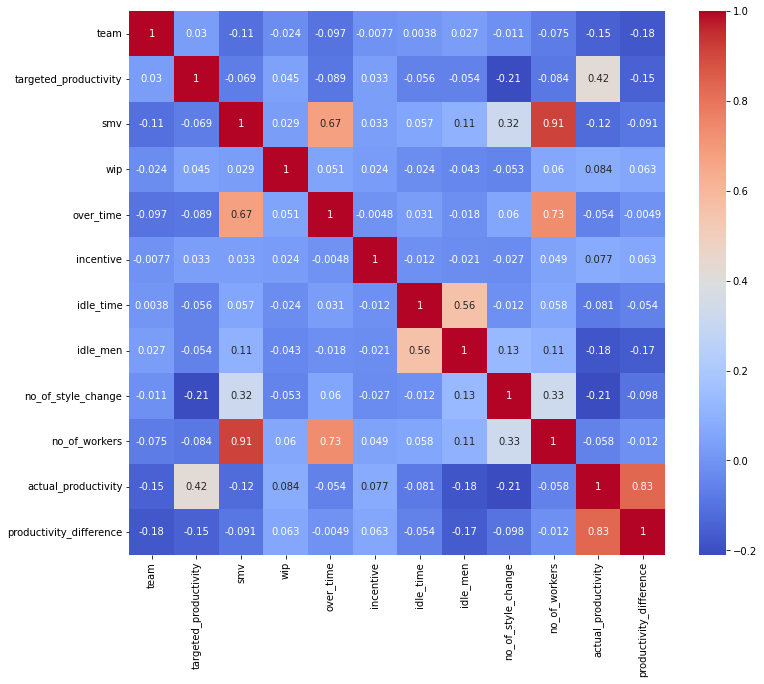

actual_productivity        1.000000
productivity_difference    0.832182
Name: actual_productivity, dtype: float64


In [50]:
plt.figure(figsize=(12,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
print(len(df), "Rows included")
plt.show()

# Correlation with dependant variable
correlation_target = abs(correlation["actual_productivity"])
selected_features_heatmap = correlation_target[correlation_target>0.5]
print(selected_features_heatmap)

In [51]:
# Select only the numerical crelevant to productivity
numerical_features = [ 'targeted_productivity', 'smv', 'over_time',
    'incentive', 'no_of_workers']
X = df[numerical_features]
y = df['actual_productivity']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# polynomial features and linear regression
degree = 2  # increase or decrease the polynomial degree
pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the polynomial regression model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_poly = pipeline.predict(X_test)

# Calculate performance metrics for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Display performance metrics
print(f"Polynomial Degree: {degree}")
print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"Mean Absolute Error (MAE): {mae_poly}")
print(f"R-squared (R²) Score: {r2_poly}")

# Compare actual and predicted productivity values
comparison_poly = pd.DataFrame({
    'Actual Productivity': y_test,
    'Predicted Productivity': y_pred_poly
})

comparison_poly.head(10)


Polynomial Degree: 2
Mean Squared Error (MSE): 0.018000756651364958
Mean Absolute Error (MAE): 0.09085918788284768
R-squared (R²) Score: 0.3220683797736097


,Actual Productivity,Predicted Productivity
921,0.268214,0.516878
321,0.800359,0.827363
101,0.681061,0.781735
920,0.325000,0.715008
58,0.667604,0.789802
790,0.800980,0.593105
948,0.768847,0.614827
969,0.768847,0.614827
410,0.650417,0.601504
1079,0.750396,0.763044


In [52]:
# Evaluate different polynomial degrees
results = []
degrees_to_test = [1, 2, 3, 4, 5]
for degree in degrees_to_test:
    # Create a pipeline for polynomial features and linear regression
    pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append({'Degree': degree, 'MSE': mse, 'R²': r2})

results_df = pd.DataFrame(results)
results_df

,Degree,MSE,R²
0,1,0.021921,0.174415
1,2,0.018001,0.322068
2,3,0.019025,0.283483
3,4,0.138944,-4.232798
4,5,0.084094,-2.167100
